In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('./Raisin_Dataset.xlsx')

df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [3]:
df['Class'].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [4]:
y = df['Class']
X = df.iloc[:,:7]

y = pd.get_dummies(y)

y

,Besni,Kecimen
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
895,1,0
896,1,0
897,1,0
898,1,0


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train.shape[1]

7

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [8]:
model = Sequential([
    Conv1D(input_shape=(X_train.shape[1], 1), filters=64, activation='relu', kernel_size=3),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 64)             256       
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense (Dense)               (None, 50)                16050     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 16,408
Trainable params: 16,408
Non-trainable params: 0
_________________________________________________________________


In [9]:
early_stopping = EarlyStopping(patience=6, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

Epoch 1/1000
22/22 [==============================] - 1s 7ms/step - loss: 1181.1647 - accuracy: 0.4785 - val_loss: 421.6700 - val_accuracy: 0.4667
Epoch 2/1000
22/22 [==============================] - 0s 2ms/step - loss: 346.8654 - accuracy: 0.5200 - val_loss: 121.0193 - val_accuracy: 0.4667
Epoch 3/1000
22/22 [==============================] - 0s 2ms/step - loss: 95.9816 - accuracy: 0.5348 - val_loss: 339.5459 - val_accuracy: 0.4667
Epoch 4/1000
22/22 [==============================] - 0s 3ms/step - loss: 210.8298 - accuracy: 0.4741 - val_loss: 351.3221 - val_accuracy: 0.8311
Epoch 5/1000
22/22 [==============================] - 0s 2ms/step - loss: 293.2160 - accuracy: 0.5126 - val_loss: 319.1688 - val_accuracy: 0.4667
Epoch 6/1000
22/22 [==============================] - 0s 2ms/step - loss: 204.3640 - accuracy: 0.5422 - val_loss: 329.8453 - val_accuracy: 0.5333
Epoch 7/1000
22/22 [==============================] - 0s 2ms/step - loss: 220.4892 - accuracy: 0.5111 - val_loss: 535.6978 -

In [10]:
y_pred_argmax = np.argmax(y_pred, axis=1)

y_pred_argmax

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


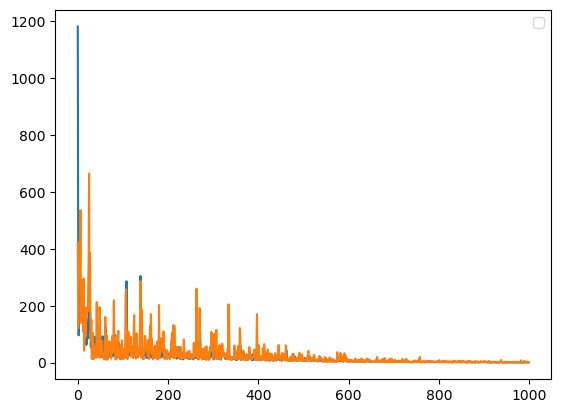

In [11]:
import pandas as pd

hist = history.history

x = np.arange(0, 1000)
y = hist['loss']
y_val = hist['val_loss']

plt.plot(x, y)
plt.plot(x, y_val)

plt.legend()